In [615]:
# loeme sisse vajalikud paketid
# numpy & pandas -> data manipulation
# yfinance aitab finants tickers sisse võtta
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


In [616]:
#loeme sisse S&P500 indexsi SPY 
df = yf.download("SPY", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [617]:
#saab ka lugeda sisse mitmeid tickereid korraga
#microsoft, coca-cola, apple, google, nike, visa, kellogs, 20 aasta võlakiri ETF,  
#Seekord võtame ainult SPY

symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", "SPY", "^VIX"
symbols = "SPY" 

In [618]:
#df -> dataframe
#df_multiple_symbols -> lisame ylevalt symbolid sisse 
df = yf.download(symbols, start="2013-01-01", end="2023-01-01")
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


In [619]:
#vaatame dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.399689,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.127617,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.655235,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.325508,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.979301,121265100
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839264,70911500


In [620]:
#võtame Close dataframist
close = df["Close"]

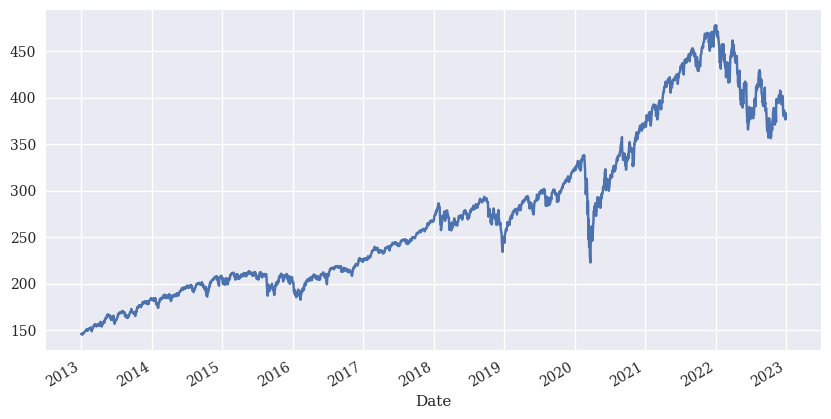

In [621]:
#SPY close hind pildina
close.plot(figsize=(10,5), subplots=True);

In [622]:
#SPY close hind yhikud, mea, standard deviation, min, 25%, 50%, 75%, max
close.describe().round(2) 

count    2518.00
mean      273.95
std        86.89
min       145.55
25%       205.14
50%       258.24
75%       326.81
max       477.71
Name: Close, dtype: float64

In [623]:
#SPY close hind erinevad mõõtmed, 2 kohta peale koma
close.aggregate([min, np.mean, np.std, np.median,max]).round(2)

min       145.55
mean      273.95
std        86.89
median    258.24
max       477.71
Name: Close, dtype: float64

In [624]:
#SPY percent hinnamuutus võtame 3 peale koma
close.pct_change().round(3).head()

Date
2013-01-02      NaN
2013-01-03   -0.002
2013-01-04    0.004
2013-01-07   -0.003
2013-01-08   -0.003
Name: Close, dtype: float64

In [625]:
#close diff().mean()
close.diff().mean()

0.09390941403146107

In [626]:
#dataframe mitmed symbolid ja close hind ainult
df_multiple_symbols = df_multiple_symbols["Close"] 

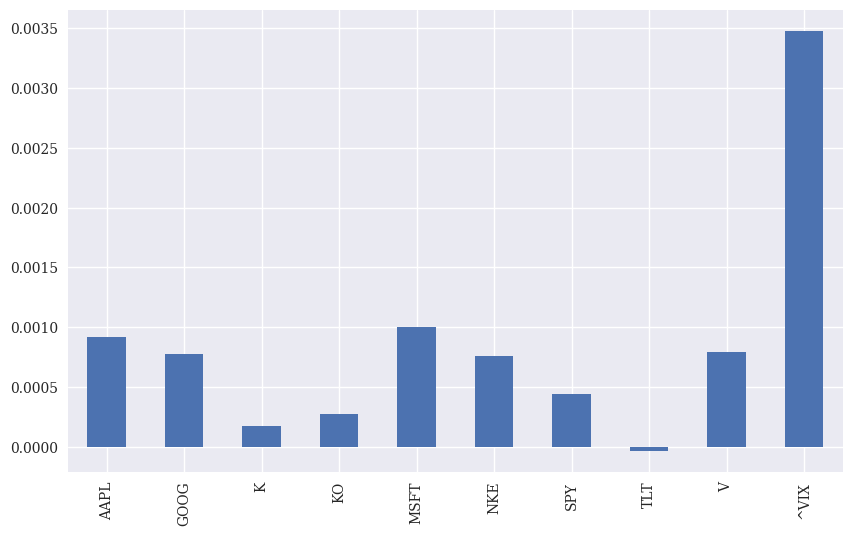

In [627]:
#mitmed symbolid nende precent vahe ja mean
df_multiple_symbols.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [628]:
#logaritmilised return vektori moodi
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))

In [629]:
#logarimilised tulemused ja kolm kohta peale koma
rets.head().round(3) 

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.013,0.001,-0.007,0.000,-0.013,0.010,-0.002,-0.014,0.001,-0.008
2013-01-04,-0.028,0.020,0.002,0.002,-0.019,0.010,0.004,0.004,0.008,-0.051
2013-01-07,-0.006,-0.004,0.000,-0.010,-0.002,0.002,-0.003,0.000,0.007,-0.003
2013-01-08,0.003,-0.002,0.003,-0.007,-0.005,-0.011,-0.003,0.007,0.009,-0.012


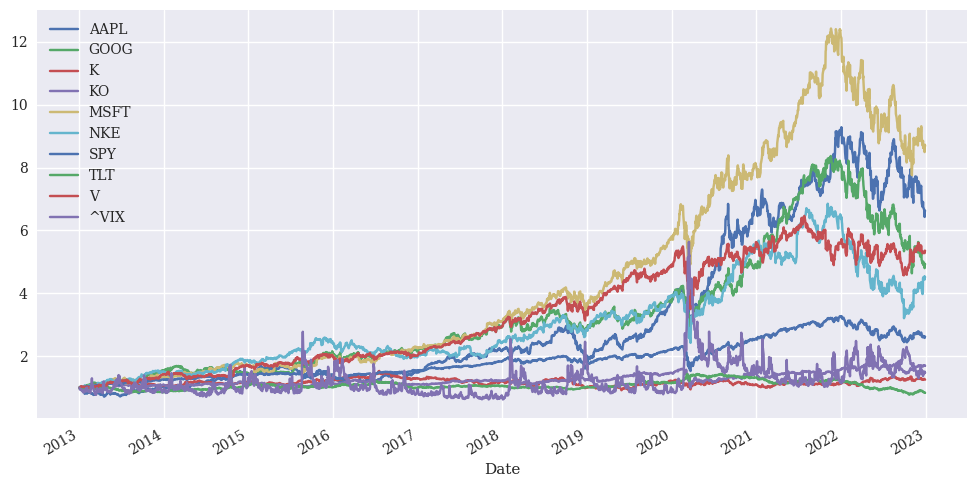

In [630]:
#cumsum() on kumulatiivne summa 
# Erinevad stock tulemused 
rets.cumsum().apply(np.exp).plot(figsize=(12, 6));

In [631]:
#vaatame tablelist millised tulemused on 
#parim Micrsoft 8.6x investment ja halvim 20 aasta võlakirja ETF
rets.cumsum().apply(np.exp)

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.000581,0.993147,1.000000,0.986604,1.010224,0.997741,0.986450,1.000772,0.991826
2013-01-04,0.959875,1.020353,0.995256,1.001596,0.968139,1.020062,1.002122,0.990298,1.008946,0.942098
2013-01-07,0.954228,1.015901,0.995607,0.992021,0.966329,1.021605,0.999384,0.990716,1.016154,0.939373
2013-01-08,0.956797,1.013896,0.998946,0.985106,0.961260,1.010802,0.996508,0.997240,1.025615,0.927793
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6.724733,4.985642,1.268318,1.697340,8.643374,4.484954,2.621594,0.854466,5.298751,1.421662
2022-12-27,6.631405,4.881277,1.276928,1.707713,8.579290,4.535494,2.611256,0.837571,5.310593,1.474796
2022-12-28,6.427919,4.799672,1.260235,1.690692,8.491310,4.435957,2.578803,0.832636,5.277127,1.508174


In [632]:
# Mitmed andmed 1 nädalase intervalliga ja ainult esimsed
df_multiple_symbols.resample('1w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-30,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.83
2013-01-06,18.582144,18.430668,57.020000,36.910000,26.830000,26.549999,147.070007,119.849998,40.290001,13.36
2013-01-13,17.857143,17.546980,58.209999,37.700001,27.250000,26.645000,148.330002,120.040001,39.567501,12.46
2013-01-20,15.710000,18.771391,58.840000,37.049999,27.879999,27.775000,150.250000,118.029999,39.959999,12.89
2013-01-27,16.200714,19.317593,58.650002,37.540001,27.930000,26.850000,151.240005,115.540001,39.639999,12.90


In [633]:
# Mitmed andmed 5 nädalase intervalliga
df_multiple_symbols.resample('5w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-02,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.83
2013-01-06,16.963572,19.560930,58.910000,38.770000,27.549999,27.295000,151.800003,117.120003,39.450001,13.02
2013-02-10,15.845000,20.281481,62.200001,38.830002,28.040001,27.389999,155.830002,115.760002,39.637501,11.30
2013-03-17,13.947500,19.922077,66.099998,42.660000,29.770000,30.459999,155.479996,122.830002,40.990002,14.97
2013-04-21,15.898214,21.751471,64.449997,42.240002,34.270000,31.395000,165.309998,116.800003,45.112499,13.99


In [634]:
#1 kuu intervalliga
df_multiple_symbols.resample('1m', label='left').last().head() 

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2012-12-31,16.267500,18.821701,58.500000,37.240002,27.450001,27.025000,149.699997,117.320000,39.477501,14.280000
2013-01-31,15.764286,19.955202,60.500000,38.720001,27.799999,27.230000,151.610001,118.510002,39.660000,15.510000
2013-02-28,15.809286,19.780607,64.430000,40.439999,28.610001,29.504999,156.669998,117.760002,42.459999,12.700000
2013-03-31,15.813571,20.537271,65.040001,42.330002,33.099998,31.799999,159.679993,123.010002,42.115002,13.520000
2013-04-30,16.061787,21.699165,62.049999,39.990002,34.900002,30.830000,163.449997,114.449997,44.535000,16.299999


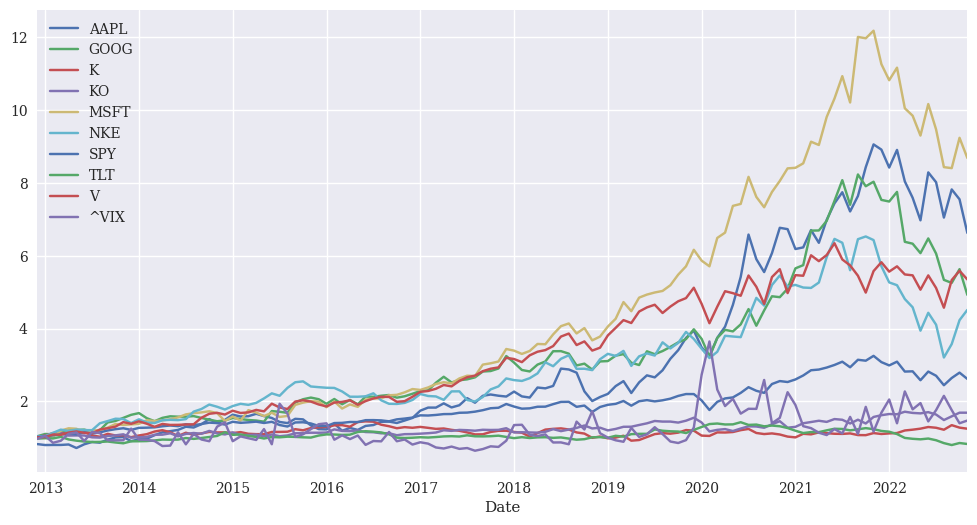

In [635]:
#1 kuu intervalliga 
rets.cumsum().apply(np.exp).resample('1m', label='left').last().plot(figsize=(12, 6)); 

In [636]:
#võtame yhe symboli ja eemaldame tyhjad
sym = 'KO'
df_multiple_symbols = pd.DataFrame(df_multiple_symbols[sym]).dropna()   
df_multiple_symbols.tail()

,KO
Date,
2022-12-23,63.820000
2022-12-27,64.209999
2022-12-28,63.570000
2022-12-29,63.950001
2022-12-30,63.610001


In [637]:
#võtme numbri 20 ja kalkuleerime erinevad väärtused : min, mean, std, median, max, 
# ja ewma(exponential moving average)
window = 20 
df_multiple_symbols["min"] = df_multiple_symbols[sym].rolling(window=window).min()
df_multiple_symbols["mean"] = df_multiple_symbols[sym].rolling(window=window).mean()
df_multiple_symbols["std"] = df_multiple_symbols[sym].rolling(window=window).std()
df_multiple_symbols["median"] = df_multiple_symbols[sym].rolling(window=window).median()
df_multiple_symbols["max"] = df_multiple_symbols[sym].rolling(window=window).max()
df_multiple_symbols["ewma"] = df_multiple_symbols[sym].ewm(halflife = 0.5 ,min_periods=window).mean()

<AxesSubplot:xlabel='Date'>

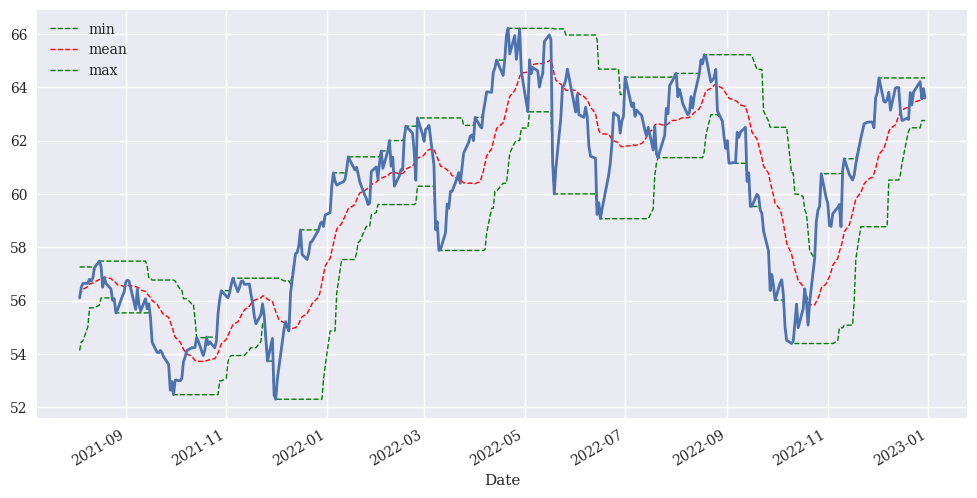

In [638]:
#võtame 3 väärtust : min, mean ja max ja vaatame viimased 200 päeva, 
#rohelised max ja min ning punane ewmakeskel
keltner_channel = df_multiple_symbols[['min', 'mean', 'max']].iloc[-356:].plot(
    figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=1)
df_multiple_symbols[sym].iloc[-356:].plot(ax=keltner_channel, lw=2.0)

In [639]:
#võtame keskmised liikuvad keskmised 55 päeva ja 252 päeva
df_multiple_symbols['SMA1'] = df_multiple_symbols[sym].rolling(window=55).mean()
df_multiple_symbols['SMA2'] = df_multiple_symbols[sym].rolling(window=252).mean()
df_multiple_symbols[[sym, 'SMA1', 'SMA2']].tail()

,KO,SMA1,SMA2
Date,,,
2022-12-23,63.820000,60.423818,61.590278
2022-12-27,64.209999,60.600182,61.612341
2022-12-28,63.570000,60.767091,61.630952
2022-12-29,63.950001,60.939273,61.650794
2022-12-30,63.610001,61.093273,61.669960


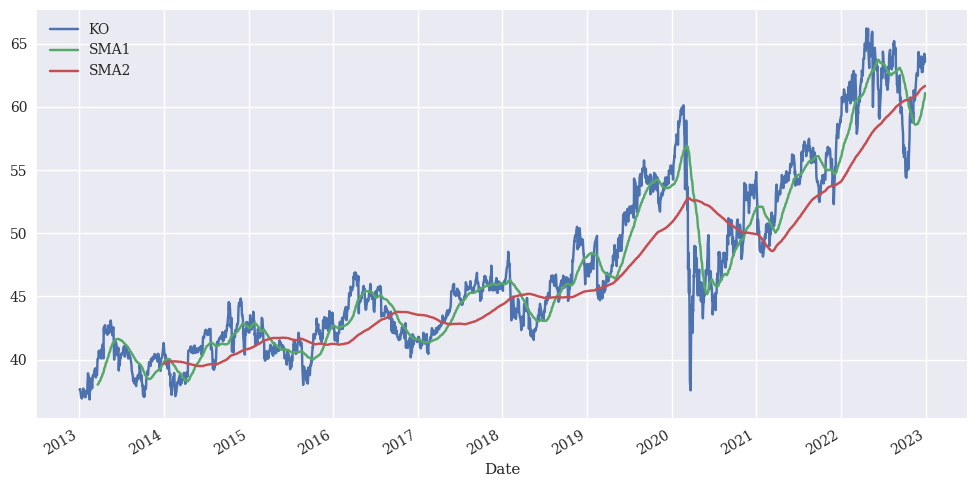

In [640]:
#toome graafikuna välja
df_multiple_symbols[[sym, 'SMA1', 'SMA2']].plot(figsize=(12, 6));

In [641]:
#igaks juhuks ainult tulbad kus on väärtused
df_multiple_symbols.dropna(inplace=True)

In [642]:
df_multiple_symbols['positions'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)

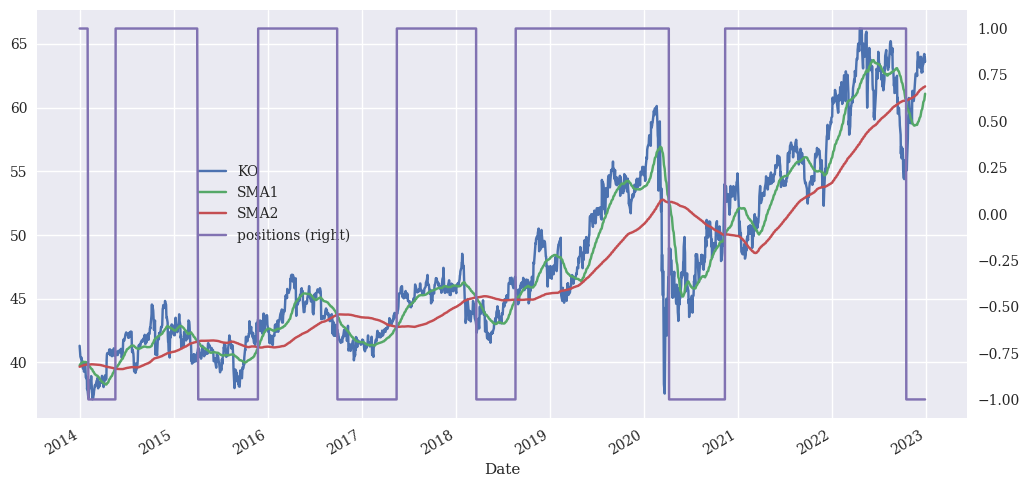

In [643]:
keltner_channel = df_multiple_symbols[[sym, 'SMA1', 'SMA2', 'positions']].plot(
    figsize=(12, 6),secondary_y='positions')
keltner_channel.get_legend().set_bbox_to_anchor((0.35, 0.65));

In [644]:
symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", "^VIX", "SPY"
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")


[*********************100%***********************]  10 of 10 completed


In [645]:
df_multiple_symbols["Close"]

,AAPL,GOOG,K,KO,MSFT,NKE,SPY,TLT,V,^VIX
Date,,,,,,,,,,
2013-01-02,19.608213,18.013729,56.910000,37.599998,27.620001,25.920000,146.059998,119.559998,38.845001,14.680000
2013-01-03,19.360714,18.024191,56.520000,37.599998,27.250000,26.184999,145.729996,117.940002,38.875000,14.560000
2013-01-04,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,146.369995,118.400002,39.192501,13.830000
2013-01-07,18.710714,18.300158,56.660000,37.299999,26.690001,26.480000,145.970001,118.449997,39.472500,13.790000
2013-01-08,18.761070,18.264042,56.849998,37.040001,26.549999,26.200001,145.550003,119.230003,39.840000,13.620000
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,89.809998,72.180000,63.820000,238.729996,116.250000,382.910004,102.160004,205.830002,20.870001
2022-12-27,130.029999,87.930000,72.669998,64.209999,236.960007,117.559998,381.399994,100.139999,206.289993,21.650000
2022-12-28,126.040001,86.459999,71.720001,63.570000,234.529999,114.980003,376.660004,99.550003,204.990005,22.139999


In [646]:
df_multiple_symbols = df_multiple_symbols["Close"] 
df_multiple_symbols = df_multiple_symbols[["SPY", "^VIX"]].dropna()
df_multiple_symbols


,SPY,^VIX
Date,,
2013-01-02,146.059998,14.680000
2013-01-03,145.729996,14.560000
2013-01-04,146.369995,13.830000
2013-01-07,145.970001,13.790000
2013-01-08,145.550003,13.620000
...,...,...
2022-12-23,382.910004,20.870001
2022-12-27,381.399994,21.650000
2022-12-28,376.660004,22.139999


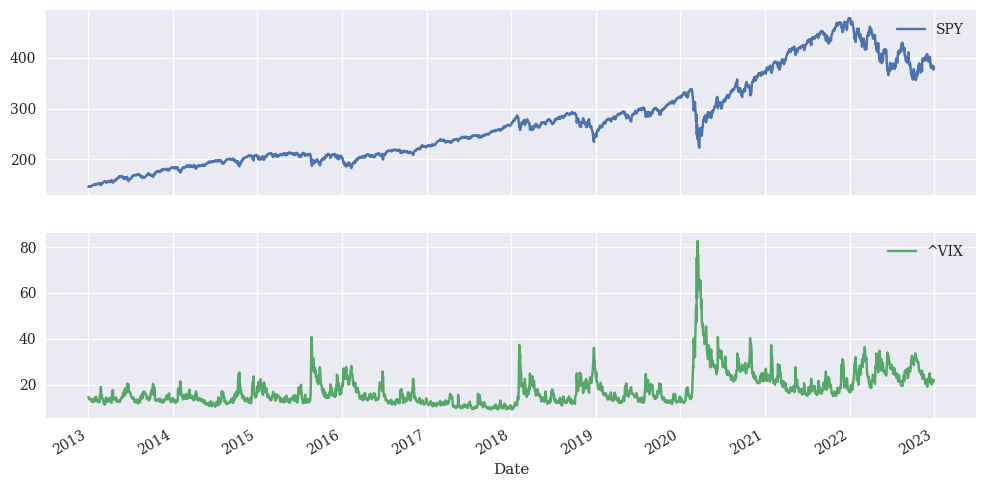

In [647]:
df_multiple_symbols.plot(subplots=True, figsize=(12, 6));

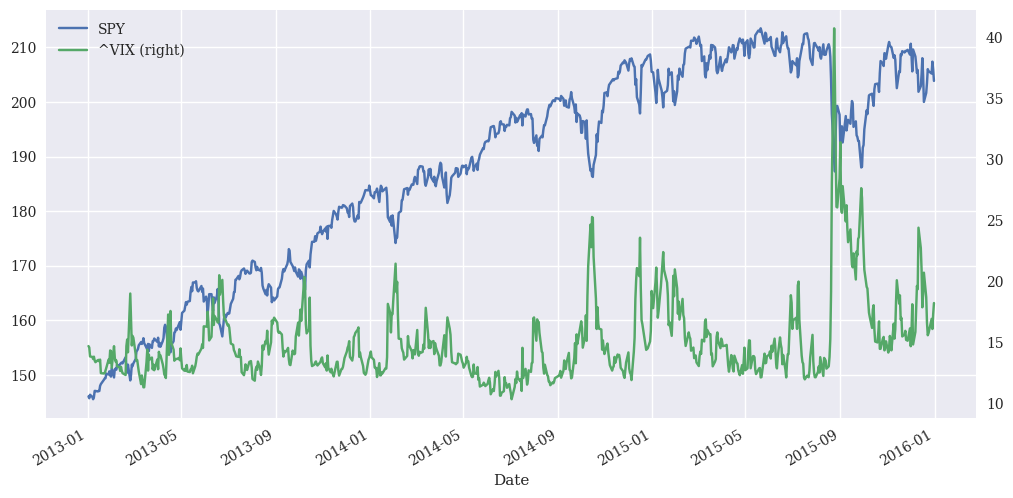

In [648]:
df_multiple_symbols.loc[:"2015-12-31"].plot(secondary_y="^VIX", figsize=(12, 6)); 